In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from wordcloud import WordCloud

In [87]:
mo=pd.read_csv('data.csv')

In [88]:
mo.head(20)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,p1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,p3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,p6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,p14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,p8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,p9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,p10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,p939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,1/5/21,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,p13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,p940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,1/5/21,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


# General Info about the DATASET

In [ ]:
mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


# Get Overall Statistics about the dataframe

In [ ]:
mo.describe(include='all')

<ipython-input-19-b953099d5e2b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mo.describe(include='all')


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year,month,day
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790,8790.000000,8790.000000,8790.000000
unique,8790,2,8787,4528,86,1713,NaN,14,220,513,NaN,NaN,NaN
top,p1,Movie,9-Feb,Not Given,United States,2020-01-01 00:00:00,NaN,TV-MA,1 Season,"Dramas, International Movies",NaN,NaN,NaN
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-12-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN,2018.873606,5.255631,13.900228
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN,1.573568,3.821489,8.641673
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,2008.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,2018.000000,1.000000,7.000000


# **Check for Missing Values**

In [ ]:
print("Any missing value?",mo.isnull().values.any())

Any missing value? False


<AxesSubplot:>

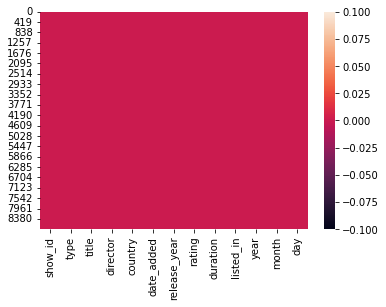

In [ ]:
sns.heatmap(mo.isnull())

## **Check for Duplicate data**

In [ ]:
print("Are there any duplicate?",mo.duplicated().any())

Are there any duplicate? False


# TOP 10 DIRECTORS WHO RELESED MOVIES OVER LAST DECADE

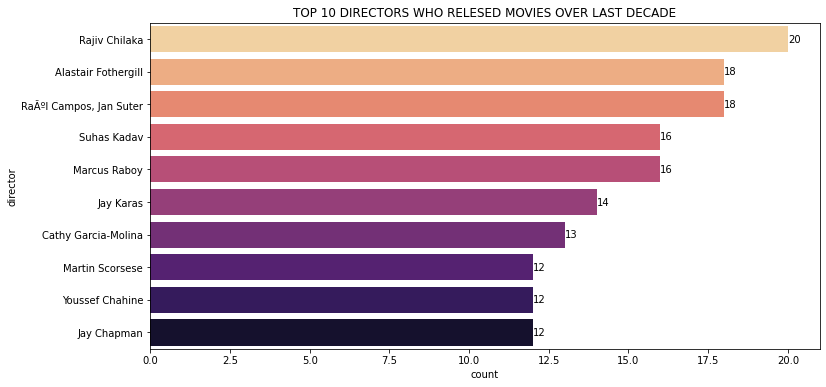

In [89]:
plt.figure(figsize=(12,6))
ax=sns.countplot(y='director',order=mo['director'].value_counts().index[1:11],data=mo, palette='magma_r')
plt.title('TOP 10 DIRECTORS WHO RELESED MOVIES OVER LAST DECADE')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

# In which year most movies were released?

In [90]:
mo.date_added

0        9/25/2021
1        9/24/2021
2        9/24/2021
3        9/22/2021
4        9/24/2021
           ...    
8785     1/17/2017
8786     9/13/2018
8787    12/15/2016
8788     6/23/2018
8789        7/6/18
Name: date_added, Length: 8790, dtype: object

In [91]:
mo['date_added']=pd.to_datetime(mo.date_added)

In [92]:
mo['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-22
4      2021-09-24
          ...    
8785   2017-01-17
8786   2018-09-13
8787   2016-12-15
8788   2018-06-23
8789   2018-07-06
Name: date_added, Length: 8790, dtype: datetime64[ns]

In [93]:
mo['year']=pd.DatetimeIndex(mo.date_added).year

In [94]:
mo['month']=pd.DatetimeIndex(mo.date_added).month

In [95]:
mo['day']=pd.DatetimeIndex(mo.date_added).day

In [96]:
mo

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year,month,day
0,p1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25
1,p3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24
2,p6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24
3,p14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22
4,p8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,p8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,1,17
8786,p8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,9,13
8787,p8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,12,15
8788,p8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,6,23


In [97]:
 mo['freq_count'] = mo.groupby('year')['year'].transform('count')

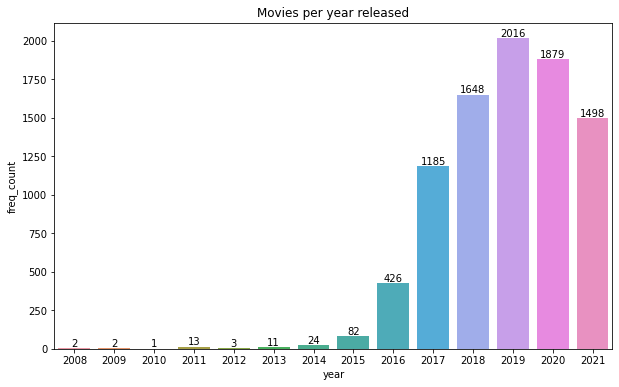

In [98]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='year',y='freq_count',data=mo)
plt.title('Movies per year released')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

<AxesSubplot:xlabel='release_year'>

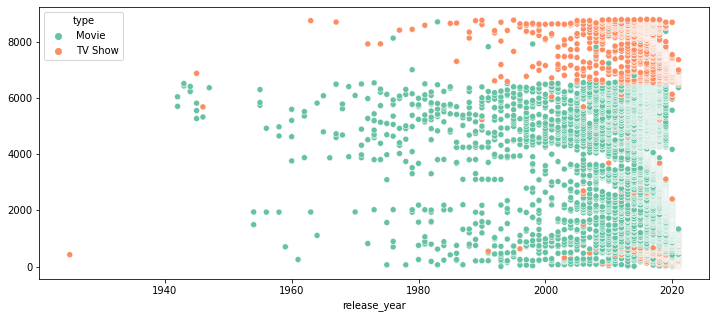

In [117]:
plt.figure(figsize = (12,5))
sns.scatterplot(y = mo.index , x = mo.release_year , hue = mo.type , palette='Set2')

# Rating wise movie and tv shows count

In [99]:
mo.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

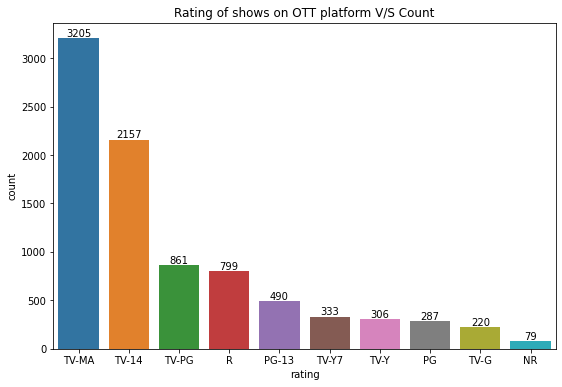

In [100]:
plt.figure(figsize=(9,6))
ax=sns.countplot(x='rating',order=mo['rating'].value_counts().index[0:10],data=mo)
plt.title('Rating of shows on OTT platform V/S Count')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [101]:
z = mo.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z,values='counts',names='rating',title='Distribution of Content rating on OTT platform')
pieChart.show()

## **Country wise content on OTT platform**

In [102]:
mo['country'].value_counts().head(10)

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: country, dtype: int64

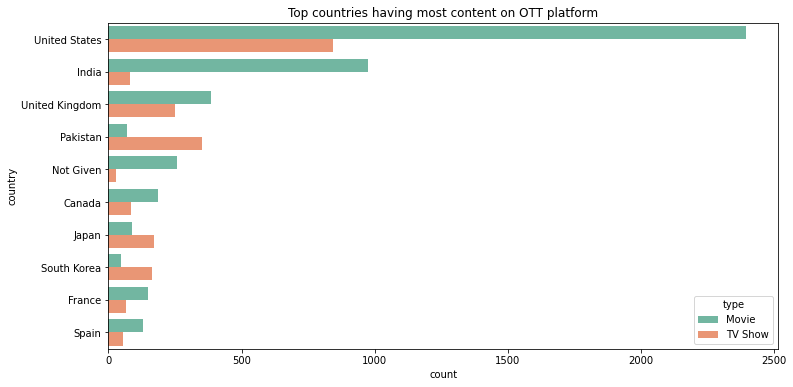

In [103]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data = mo,y = 'country', order = mo["country"].value_counts().index[:10],hue = 'type',palette = 'Set2')
plt.title("Top countries having most content on OTT platform")
plt.show()

# How many movies and tv shows are there in the dataset

In [104]:
mo.groupby('type').type.count()

type
Movie      6126
TV Show    2664
Name: type, dtype: int64

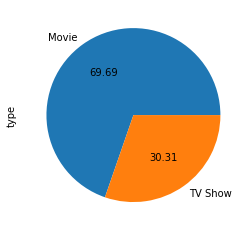

In [105]:
mo['type'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

## **Popular Genres Analysis**

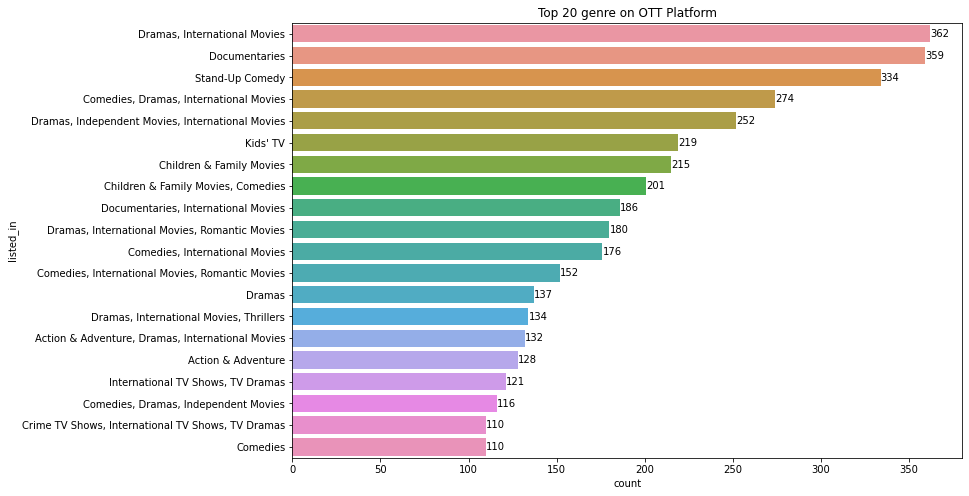

In [106]:
plt.figure(figsize=(12,8))
ax=sns.countplot(y='listed_in',order=mo['listed_in'].value_counts().index[0:20],data=mo)
plt.title('Top 20 genre on OTT Platform')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

# **Growth Of Content Creation over the years on OTT platforms**

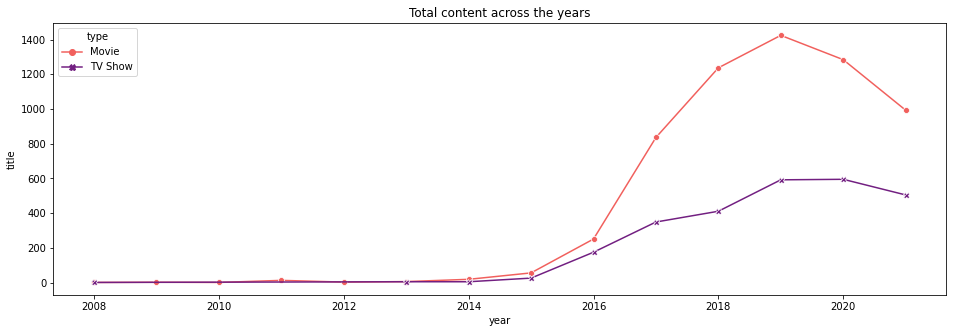

In [107]:
type_year = (mo.groupby(['type','year'])['title'].size()).reset_index()

fig = plt.figure(figsize=(16,5))
sns.lineplot(data = type_year,x = 'year',y = 'title',hue = 'type',style = 'type',palette='magma_r',markers=True, dashes=False)
plt.title("Total content across the years")
plt.show()

# **What month has the most content added to Netflix?**

In [120]:
months_name = (
    pd.to_datetime(mo['date_added'])
    .dt.month_name()
)
months_name

0       September
1       September
2       September
3       September
4       September
          ...    
8785      January
8786    September
8787     December
8788         June
8789         July
Name: date_added, Length: 8790, dtype: object

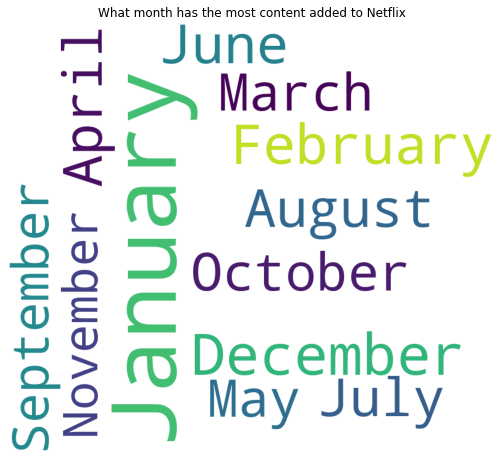

In [139]:
plt.figure(figsize=(9, 8))
wordcloud = (
    WordCloud(width=900, height=800, background_color='white')
    .generate_from_frequencies(months_name.value_counts())
)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('What month has the most content added to Netflix')
plt.show()

# **Trend in duration of movies**


In [112]:
tv_shows = mo[mo.type == 'TV Show'].copy()
movie = mo[mo.type == 'Movie'].copy()

In [113]:
movie['duration'] = movie['duration'].str.replace(' min','').astype(int)

In [114]:
tv_shows['duration']=tv_shows['duration'].str.split(' ').str[0]
tv_shows.rename(columns = {'duration':'season'}, inplace = True)

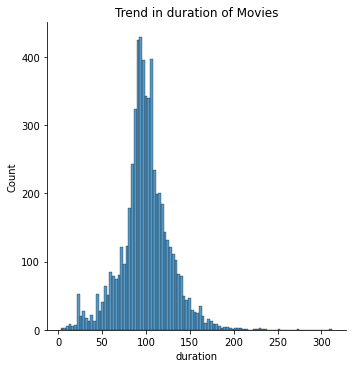

In [115]:
sns.displot(data=movie,x='duration',bins=100)
plt.title('Trend in duration of Movies')
plt.show()

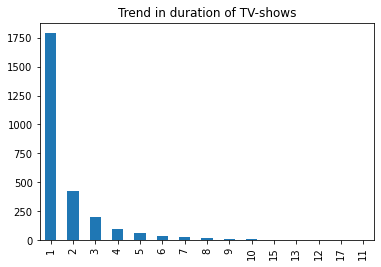

In [116]:
tv_shows['season'].value_counts().plot(kind='bar')
plt.title('Trend in duration of TV-shows')
plt.show()

# Plotting pairwise associations between variables in a dataset in summary.

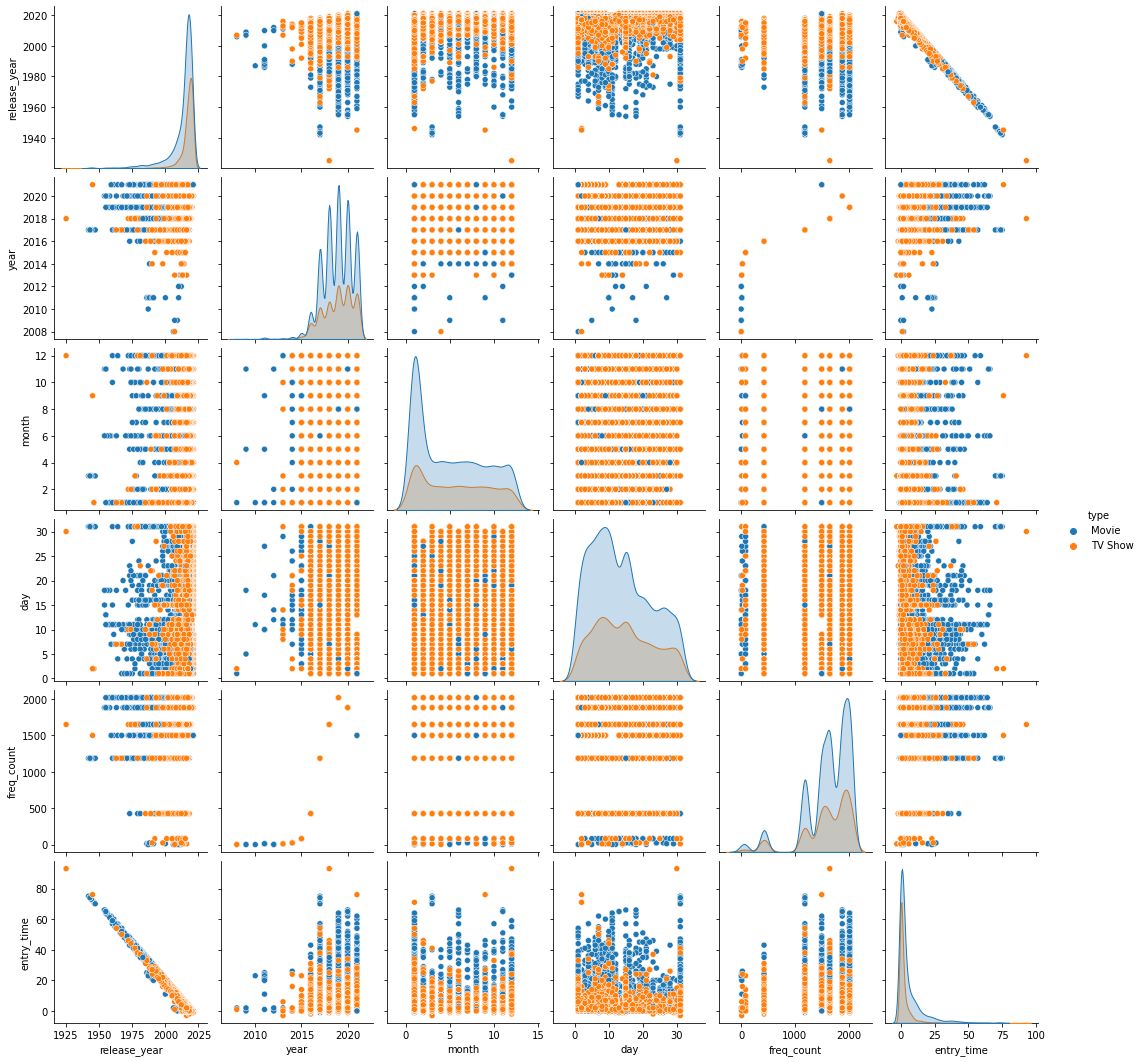

In [146]:
sns.pairplot(mo, hue = 'type')
plt.show()